In [2]:
#import liraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [3]:
dataset=pd.read_csv('/content/online_retail.csv')
dataset.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#check rows and columns
dataset.shape

(82485, 8)

In [5]:
#check specific number of rows
dataset.iloc[29:35]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France
32,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,2010-12-01 08:45:00,1.25,12583.0,France
33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2010-12-01 08:45:00,2.95,12583.0,France
34,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2010-12-01 08:45:00,2.95,12583.0,France


In [6]:
#check random data
dataset.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
62426,541497,22211,WOOD STAMP SET FLOWERS,1,2011-01-18 15:19:00,1.63,NaN,United Kingdom
43862,540153,22678,FRENCH BLUE METAL DOOR SIGN 3,10,2011-01-05 11:25:00,1.25,15841.0,United Kingdom
67569,541838,82494L,WOODEN FRAME ANTIQUE WHITE,6,2011-01-23 10:43:00,2.95,12916.0,United Kingdom
71759,542192,22384,LUNCH BAG PINK POLKADOT,10,2011-01-26 11:27:00,1.65,14049.0,United Kingdom
23585,538206,90082B,DIAMANTE BOW BROOCH RED COLOUR,8,2010-12-10 11:31:00,6.35,17827.0,United Kingdom
11169,537240,22042,CHRISTMAS CARD SINGING ANGEL,5,2010-12-06 10:08:00,0.43,NaN,United Kingdom
77416,542727,22677,FRENCH BLUE METAL DOOR SIGN 2,2,2011-01-31 15:09:00,1.25,17604.0,United Kingdom
36664,539451,22382,LUNCH BAG SPACEBOY DESIGN,2,2010-12-17 16:59:00,4.21,NaN,United Kingdom
26793,538524,20716,PARTY FOOD SHOPPER BAG,2,2010-12-13 09:35:00,2.51,NaN,United Kingdom
50671,540551,85049H,URBAN BLACK RIBBONS,8,2011-01-10 09:43:00,0.85,NaN,United Kingdom


# **Exploratory Data Analysis**

In [8]:
#Make another copy of dataset
copy_data=dataset.copy()

In [9]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82485 entries, 0 to 82484
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    82485 non-null  object 
 1   StockCode    82485 non-null  object 
 2   Description  82230 non-null  object 
 3   Quantity     82485 non-null  int64  
 4   InvoiceDate  82485 non-null  object 
 5   UnitPrice    82485 non-null  float64
 6   CustomerID   52406 non-null  float64
 7   Country      82485 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 5.0+ MB


In [15]:
#check missing value
copy_data.isnull().sum().sort_values(ascending=False)

,0
CustomerID,30079
Description,255
StockCode,0
InvoiceNo,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


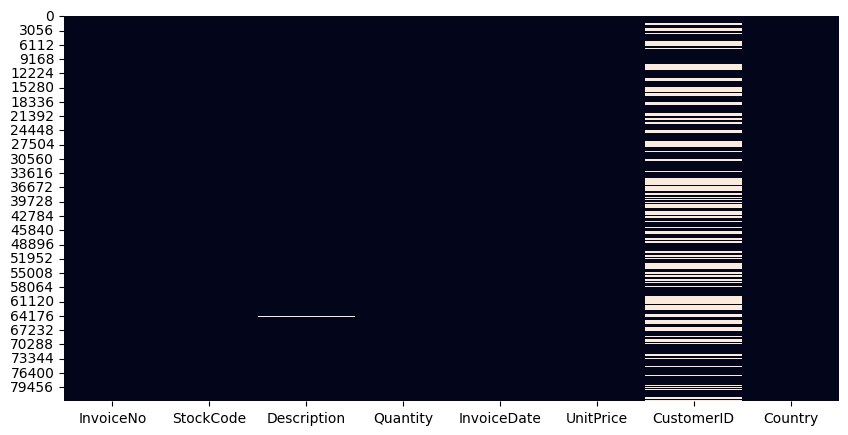

In [12]:
#Vistualizated the data
plt.figure(figsize=(10,5))
sns.heatmap(copy_data.isnull(), cbar=False)
plt.show()

In [ ]:
copy_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# `Fill Null Values`

In [ ]:
#Check the total null values in description column
copy_data['Description'].isnull().sum()

np.int64(1454)

In [ ]:
#fill the null values of description
copy_data['Description']=copy_data.groupby('StockCode')['Description'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

In [ ]:
#Check the total null values in description column
copy_data['Description'].isnull().sum()

np.int64(0)

### Fill NAN values of Customer id

In [ ]:
#Check the total null values in customerid column
copy_data['CustomerID'].isnull().sum()

np.int64(135080)

In [ ]:
#Fill customer id missings values
copy_data['CustomerID']=copy_data['CustomerID'].ffill().bfill()

In [ ]:
#Check the total null values in customerid column
copy_data['CustomerID'].isnull().sum()

np.int64(0)

# **Revenue incresed Monthly**

In [ ]:
#Makes revenue column
copy_data['Revenue']=copy_data['Quantity']*copy_data['UnitPrice']

In [ ]:
#Makes new column of Month_Revenue
copy_data['Month_Revenue']=pd.to_datetime(copy_data['InvoiceDate']).dt.month
copy_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month_Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [ ]:
#Check the revenue incresed per month
Revenue_monthly= copy_data.groupby('Month_Revenue')['Revenue'].sum()
Revenue_monthly

,Revenue
Month_Revenue,
1,560000.260
2,498062.650
3,683267.080
4,493207.121
5,723333.510
6,691123.120
7,681300.111
8,682680.510
9,1019687.622


In [ ]:
#Sort the Revenue_monthly
sort_Revenue=Revenue_monthly.sort_values()
sort_Revenue

,Revenue
Month_Revenue,
4,493207.121
2,498062.650
1,560000.260
7,681300.111
8,682680.510
3,683267.080
6,691123.120
5,723333.510
9,1019687.622


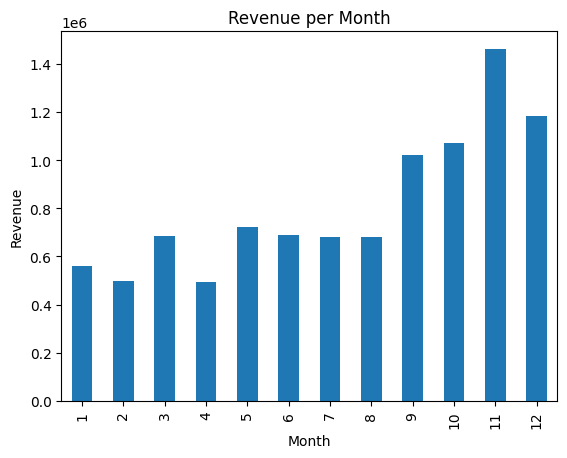

In [ ]:
#See the increase revenue per month by using plot
Revenue_monthly.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue per Month')
plt.show()

## **Revenue increased Yearly**

In [ ]:
copy_2=copy_data.copy()
copy_2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month_Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [ ]:
#Make year column
copy_2['Year']=pd.to_datetime(copy_2['InvoiceDate']).dt.year
copy_2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month_Revenue,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010


In [ ]:
#Revenue increased yearly
Revenue_yearly=copy_2.groupby('Year')['Revenue'].sum()
Revenue_yearly

,Revenue
Year,
2010,748957.020
2011,8998790.914


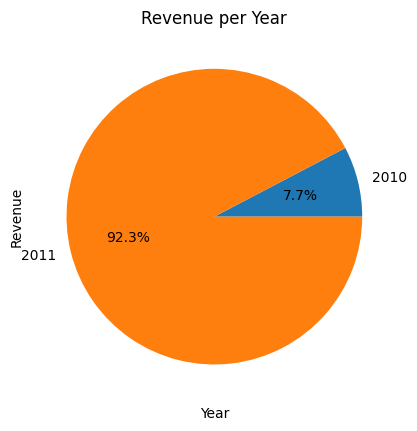

In [ ]:
#Make a plot
#put the percentage ni pie chart
Revenue_yearly.plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue per Year')
plt.show()

# **Which product had a highest sales?**

In [ ]:
#Top most product
only_highest_sales=copy_2.groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(1)
only_highest_sales

,Revenue
Description,
DOTCOM POSTAGE,206245.48


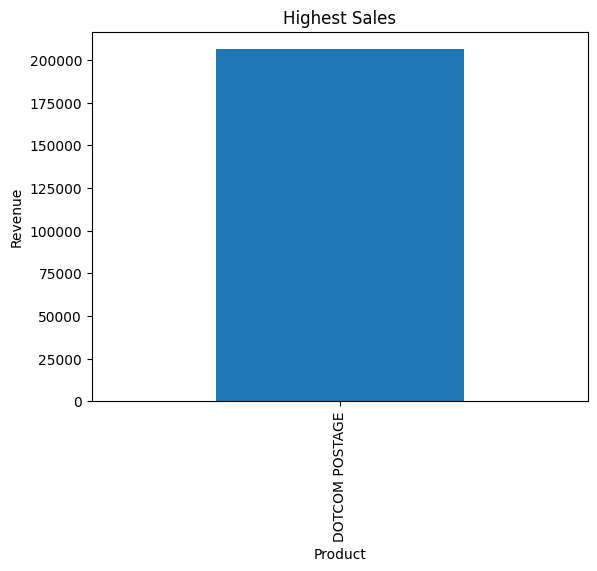

In [ ]:
#Make the plot
only_highest_sales.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Highest Sales')
plt.show()

In [ ]:
#Top 10 products
highest_sales=copy_2.groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(10)
highest_sales

,Revenue
Description,
DOTCOM POSTAGE,206245.48
REGENCY CAKESTAND 3 TIER,164762.19
WHITE HANGING HEART T-LIGHT HOLDER,99668.47
PARTY BUNTING,98302.98
JUMBO BAG RED RETROSPOT,92356.03
RABBIT NIGHT LIGHT,66756.59
POSTAGE,66230.64
PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
ASSORTED COLOUR BIRD ORNAMENT,58959.73


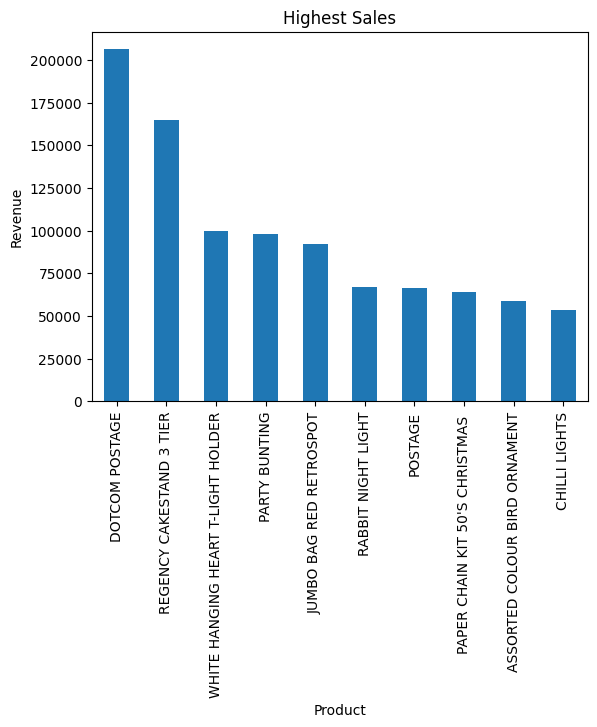

In [ ]:
#Make the plot
highest_sales.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Highest Sales')
plt.show()

# **At what time were the most products sold?**

In [ ]:
copy_2.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month_Revenue,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,12,2010


In [ ]:
#Convert the time in dt format
copy_2["InvoiceDate"]=pd.to_datetime(copy_2["InvoiceDate"])

In [ ]:
copy_2["Hours"]=copy_2["InvoiceDate"].dt.strftime('%H:%M')

In [ ]:
#Top 10 sales_hours
hourly_sales=copy_2.groupby('Hours')["Quantity"].sum().sort_values(ascending=False).head(10)
hourly_sales

,Quantity
Hours,
09:15,85388
10:01,81271
12:03,30284
13:37,25220
10:32,24760
12:34,23917
11:53,23481
13:20,22176
15:42,21772


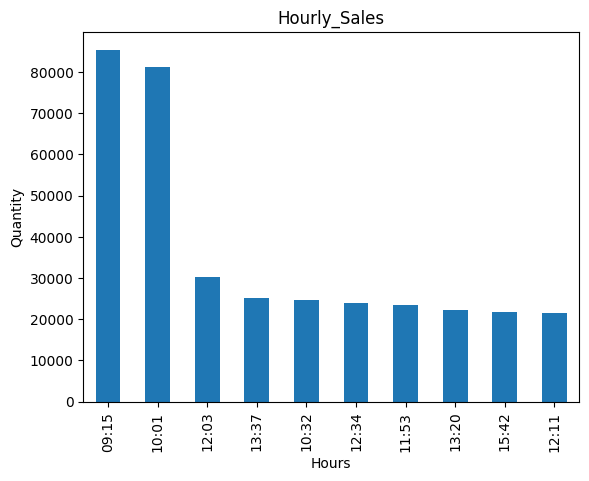

In [ ]:
#Make the plot
hourly_sales.plot(kind='bar')
plt.xlabel('Hours')
plt.ylabel('Quantity')
plt.title('Hourly_Sales')
plt.show()

# **Which are the top 10 customers?**

In [ ]:
#Top 10 customers id
top_customers =(copy_2.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10))
top_customers

,Revenue
CustomerID,
14646.0,282038.74
18102.0,272390.60
17450.0,187523.77
14911.0,147375.15
14156.0,126339.52
12415.0,124594.39
17511.0,94600.43
13694.0,72262.43
16684.0,67341.96


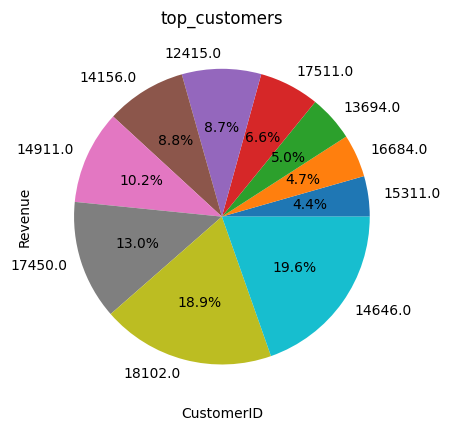

In [ ]:
#Make the plot
top_customers.plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('CustomerID')
plt.ylabel('Revenue')
plt.title('top_customers')
plt.show()

#**How many repeat customers are there?**


In [ ]:
Repeated_customer=copy_2.groupby('CustomerID').size()
Repeated_customer

,0
CustomerID,
12346.0,2
12347.0,182
12348.0,206
12349.0,73
12350.0,17
...,...
18280.0,325
18281.0,7
18282.0,13


In [ ]:
#Top 10 repeaded customers
top_Repeated_customers=Repeated_customer[Repeated_customer>1].sort_values(ascending=False).head(10)
top_Repeated_customers

,0
CustomerID,
17841.0,8644
14911.0,7648
12748.0,6134
14096.0,5412
14606.0,3952
15311.0,2913
14156.0,2825
13089.0,2693
14646.0,2385


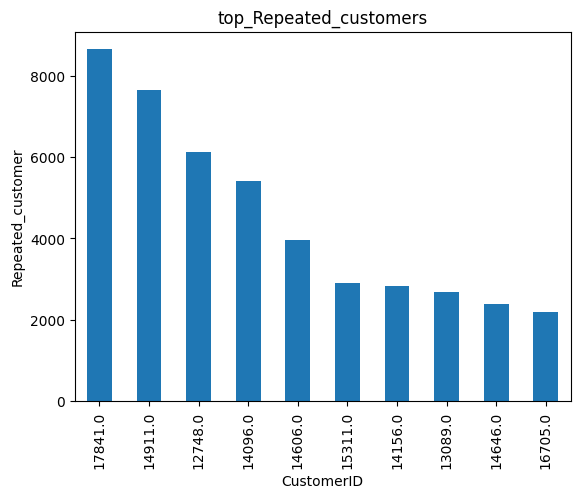

In [ ]:
#Make the plot
top_Repeated_customers.plot(kind='bar')
plt.xlabel('CustomerID')
plt.ylabel('Repeated_customer')
plt.title('top_Repeated_customers')
plt.show()



---


#**THE END**

---



